<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#HC-mit-allen-Kategorien" data-toc-modified-id="HC-mit-allen-Kategorien-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>HC mit allen Kategorien</a></span><ul class="toc-item"><li><span><a href="#HC-mit-allen-Kategorien-(Sample-5%)" data-toc-modified-id="HC-mit-allen-Kategorien-(Sample-5%)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>HC mit allen Kategorien (Sample 5%)</a></span></li></ul></li><li><span><a href="#HC-nur-mit-Sport-und-Entertainment" data-toc-modified-id="HC-nur-mit-Sport-und-Entertainment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>HC nur mit Sport und Entertainment</a></span><ul class="toc-item"><li><span><a href="#HC-nur-mit-Sport-und-Entertainment-und-25%" data-toc-modified-id="HC-nur-mit-Sport-und-Entertainment-und-25%-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>HC nur mit Sport und Entertainment und 25%</a></span></li></ul></li></ul></div>

# Imports

In [39]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import squareform
from sklearn.preprocessing import normalize
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [40]:
df = pd.read_csv("../../Datensaetze/news_POS_POS_tags_nouns_adjectives_verb.csv")
df.head(5)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415.0,244.0,quarterli profit at US media giant timewarn j...,"['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...",high fourth own fourth underlying exceptional ...,74.0,22.0,1.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379.0,230.0,the dollar ha hit it highest level against th...,"['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...",late recent sanguine current current next shar...,66.0,30.0,9.0
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,258.0,168.0,the owner of embattl russian oil giant yuko a...,"['_SP', 'DT', 'NNS', 'IN', 'VBN', 'JJ', 'NN', ...",Russian former similar foreign Legal such real...,48.0,12.0,3.0
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,400.0,256.0,british airway ha blame high fuel price for a...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'JJ', 'NN'...",high pre - tax chief respectable third full la...,77.0,31.0,2.0
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,260.0,178.0,share in UK drink and food firm alli domecq h...,"['_SP', 'NNP', 'IN', 'NNP', 'NNS', 'CC', 'NN',...",French last major global top other Last LVMH b...,42.0,13.0,2.0


# HC mit allen Kategorien

In [41]:
tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words="english")

tf_idf = tf_idf_vectorizor.fit_transform(df.content)
tf_idf_norm = normalize(tf_idf)
#tf_idf_norm = tf_idf_norm.fillna(0)
tf_idf_array = tf_idf_norm.toarray()

In [42]:
def linkage_matrix(n_samples, children, distances):
    """
    create a linkage matrix for the dendogram method in scipy
    n_samples: int, number of samples
    children: list of lists, clustered data points (should be 2)
    distances: list of distances between nodes
    """
    # Create linkage matrix
    

    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([children, distances, counts]).astype(float)

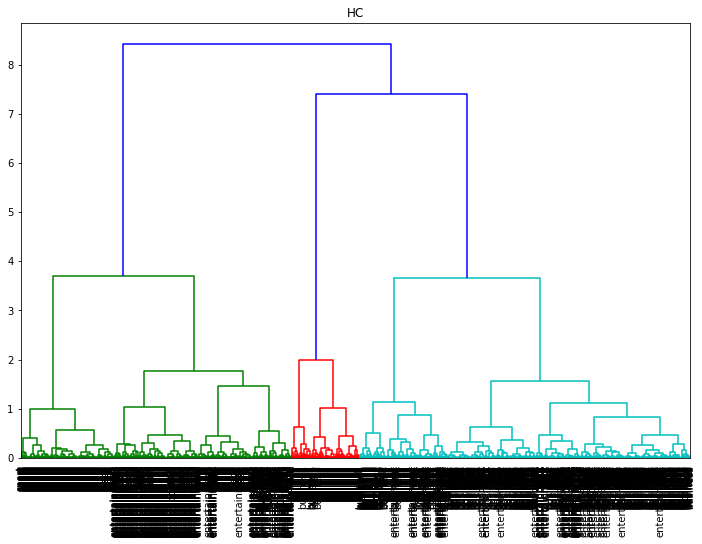

In [44]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = df.category.values, leaf_font_size=10);
#plt.savefig('../images/HC/hc_alternative_rock_dance_pop.png', bbox_inches = "tight")

## HC mit allen Kategorien (Sample 5%)

In [57]:
df_sample = df.copy()
df_sample = df_sample.sample(frac=.025, replace=False, random_state=42)
df_sample.shape

(56, 12)

In [58]:
from collections import Counter

Counter(df_sample.category)

Counter({'business': 18,
         'sport': 12,
         'politics': 8,
         'entertainment': 10,
         'tech': 8})

In [63]:
tf_idf_vectorizor = TfidfVectorizer()

tf_idf = tf_idf_vectorizor.fit_transform(df_sample.content)
tf_idf_norm = normalize(tf_idf)
#tf_idf_norm = tf_idf_norm.fillna(0)
tf_idf_array = tf_idf_norm.toarray()

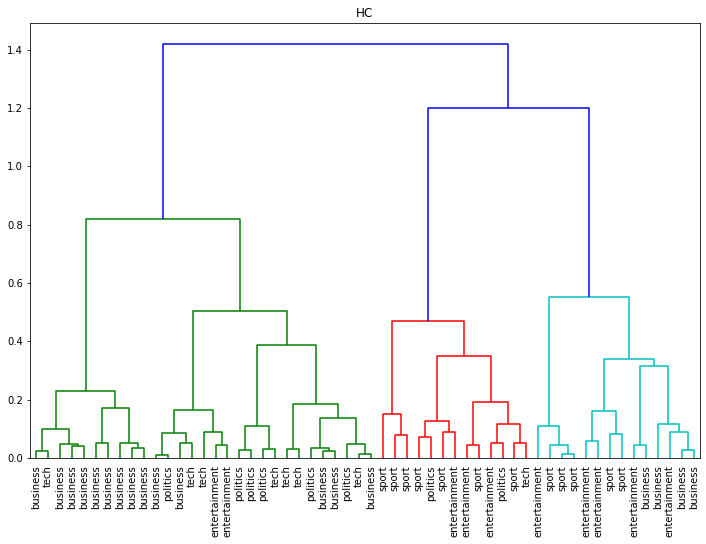

In [65]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = df_sample.category.values, leaf_font_size=10);
#plt.savefig('../../Bilder/HC/HC_Sport_Entertainment_25_percent.png', bbox_inches = "tight")

# HC nur mit Sport und Entertainment

In [23]:
data1 = df[df['category'] == 'sport']
data2 = df[df['category'] == 'entertainment']

In [24]:
data = pd.concat([data1, data2], axis = 0)

tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words="english")

tf_idf = tf_idf_vectorizor.fit_transform(data.content)
tf_idf_norm = normalize(tf_idf)
#tf_idf_norm = tf_idf_norm.fillna(0)
tf_idf_array = tf_idf_norm.toarray()

In [25]:
data

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
1313,sport,001.txt,Claxton hunting first major medal,British hurdler Sarah Claxton is confident sh...,206.0,145.0,british hurdler sarah claxton is confid she c...,"['_SP', 'JJ', 'NN', 'NNP', 'NNP', 'VBZ', 'JJ',...",British confident first major next old British...,29.0,22.0,5.0
1314,sport,002.txt,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would...,139.0,103.0,sonia o'sullivan ha indic that she would like...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'IN', 'PRP...",next old official Provincial last present firs...,16.0,9.0,2.0
1315,sport,003.txt,Greene sets sights on world title,Maurice Greene aims to wipe out the pain of l...,371.0,229.0,mauric green aim to wipe out the pain of lose...,"['_SP', 'NNP', 'NNP', 'VBZ', 'TO', 'VB', 'RP',...",fourth fellow semi semi - final final alone ab...,42.0,16.0,5.0
1316,sport,004.txt,IAAF launches fight against drugs,The IAAF - athletics' world governing body - ...,190.0,132.0,the iaaf - athlet ' world govern bodi - ha me...,"['_SP', 'DT', 'NNP', 'HYPH', 'NNS', 'POS', 'NN...",anti - doping - happy clean world body fight s...,31.0,6.0,3.0
1317,sport,005.txt,"Dibaba breaks 5,000m world record",Ethiopia's Tirunesh Dibaba set a new world re...,156.0,118.0,ethiopia 's tirunesh dibaba set a new world r...,"['_SP', 'NNP', 'POS', 'NNP', 'NNP', 'VBD', 'DT...",new previous indoor Ethiopian last compatriot ...,18.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
891,entertainment,382.txt,Last Star Wars 'not for children',The sixth and final Star Wars movie may not b...,228.0,141.0,the sixth and final star war movi may not be ...,"['_SP', 'DT', 'JJ', 'CC', 'JJ', 'NNP', 'NNP', ...",sixth final suitable young violent old unsuita...,27.0,22.0,4.0
892,entertainment,383.txt,French honour for director Parker,British film director Sir Alan Parker has bee...,220.0,153.0,british film director sir alan parker ha been...,"['_SP', 'JJ', 'NN', 'NN', 'NNP', 'NNP', 'NNP',...",British cultural immense French modern former ...,32.0,10.0,7.0
893,entertainment,384.txt,Robots march to US cinema summit,Animated movie Robots has opened at the top o...,267.0,177.0,anim movi robot ha open at the top of the US ...,"['_SP', 'VBN', 'NN', 'NNS', 'VBZ', 'VBN', 'IN'...",first big recut last original new little origi...,42.0,13.0,0.0
894,entertainment,385.txt,Hobbit picture 'four years away',Lord of the Rings director Peter Jackson has ...,256.0,156.0,lord of the ring director peter jackson ha sa...,"['_SP', 'NNP', 'IN', 'DT', 'NNPS', 'NN', 'NNP'...",lengthy major further old Australian undisclos...,35.0,10.0,2.0


In [26]:
def linkage_matrix(n_samples, children, distances):
    """
    create a linkage matrix for the dendogram method in scipy
    n_samples: int, number of samples
    children: list of lists, clustered data points (should be 2)
    distances: list of distances between nodes
    """
    # Create linkage matrix
    

    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([children, distances, counts]).astype(float)

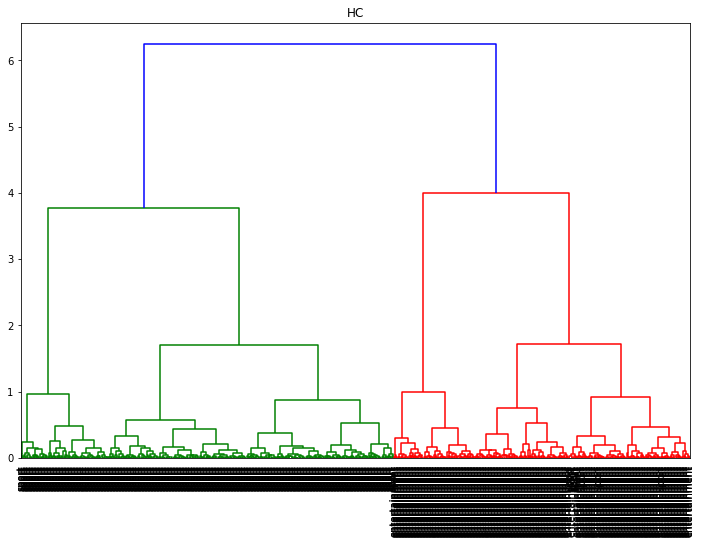

In [32]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = data.category.values, leaf_font_size=10);
#plt.savefig('../../Bilder/HC/HC_Sport_Entertainment.png', bbox_inches = "tight")

In [12]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'ro', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

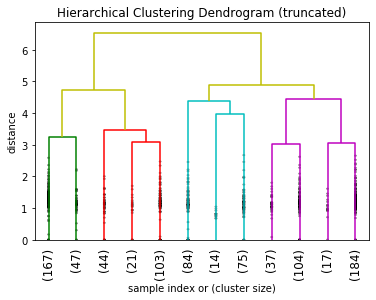

In [13]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
link_matrix = linkage_matrix(tf_idf_array.shape[0], model.children_, model.distances_)
fancy_dendrogram(
    link_matrix,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    above_threshold_color='y',
    show_contracted=True,
    annotate_above=10  # useful in small plots so annotations don't overlap
)
#plt.savefig('../images/HC/hc_latin_hiphop.png', bbox_inches = "tight")
plt.show()

## HC nur mit Sport und Entertainment und 25%

In [35]:
data_sample = data.copy()
data_sample = data_sample.sample(frac=.05, replace=False, random_state=42)
data_sample.shape

(45, 12)

In [36]:
tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words="english")

tf_idf = tf_idf_vectorizor.fit_transform(data_sample.content)
tf_idf_norm = normalize(tf_idf)
#tf_idf_norm = tf_idf_norm.fillna(0)
tf_idf_array = tf_idf_norm.toarray()

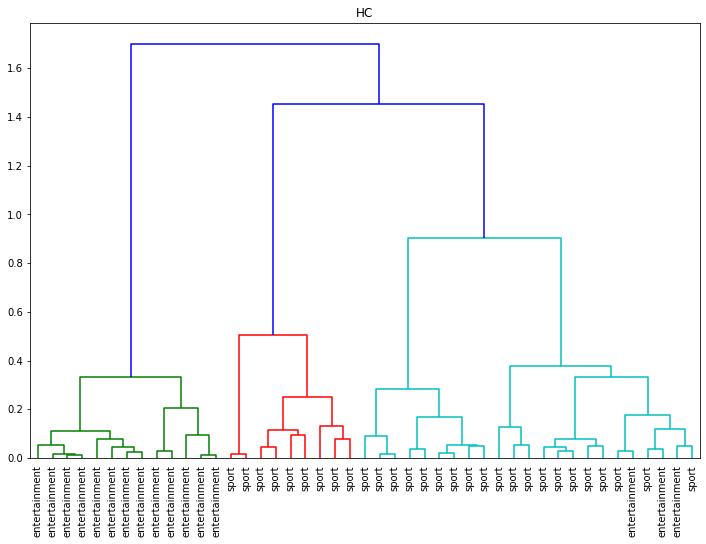

In [38]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = data_sample.category.values, leaf_font_size=10);
plt.savefig('../../Bilder/HC/HC_Sport_Entertainment_25_percent.png', bbox_inches = "tight")